<a href="https://colab.research.google.com/github/taichihaya/event/blob/master/%E3%82%A4%E3%83%99%E3%83%B3%E3%83%88%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%97%E3%83%88%EF%BC%88%E5%89%8D%E5%87%A6%E7%90%86%E3%81%82%E3%82%8A%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **使用する言語・ツール**

### Python  

機械学習や統計分析で使われる言語には大きく分けて「Python」と「R」があります。<br>
今回はそのうちのPythonを使用していきます。

### jupyter notebook  
作成したプログラムを実行、結果を記録しながらデータ分析を進めるためのツールです。 
### Google Colaboratory  
jupyter notebook を設定不要で、インターネット環境があれば無料で利用できるサービスです。

# **下準備**
各種設定を行います。  
セルにカーソルを合わせて「Shift+Enter」を押してください。 

In [0]:
###### 日本語フォントを使用できるようにする ######
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v310.json

###### ライブラリのインストール ######
!pip install dtreeviz
import pandas as pd
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz
import warnings
warnings.filterwarnings("ignore")

###### モデルの作成、結果の可視化 ######
def display_result():
  # データを選択した変数に絞る
  selected_data = modeling_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  # 訓練用、テスト用に分割
  X_train, X_test, y_train, y_test = train_test_split(selected_data,modeling_data['解約'], random_state=123)
  # 学習
  clf = DecisionTreeClassifier(max_depth=parameter.value)
  clf.fit(X_train, y_train)

  # 正解率の算出
  print('訓練データの正解率：{:.2%}'.format(clf.score(X_train, y_train)))
  print('テストデータの正解率：{:.2%}'.format(clf.score(X_test, y_test)))

  viz = dtreeviz(clf,X_train,y_train,target_name='target',
                feature_names=selected_data.columns.to_list(),
                class_names=[0,1],fontname='IPAGothic',
                scale=1.0,label_fontsize=14,ticks_fontsize=14,fancy=False) 
  display(viz)

###### 欠損値の確認 ######
def check_null():
  object_cols = raw_data.select_dtypes(['object','category']).applymap(lambda x : np.nan if x=="" else x)
  num_cols = raw_data.select_dtypes(exclude=['object','category'])


  display(pd.DataFrame({'欠損数':object_cols.isnull().sum()}).T.iloc[:,:10])
  display(pd.DataFrame({'欠損数':object_cols.isnull().sum()}).T.iloc[:,10:])
  display(pd.DataFrame({'欠損数':num_cols.isnull().sum()}).T)

###### 変数・パラメータ選択に使用するドロップダウン、スライダーの作成準備 ######

modeling_data_url = 'https://raw.githubusercontent.com/taichihaya/event/master/modeling_data.csv'
modeling_data = pd.read_csv(modeling_data_url, error_bad_lines=False)

# IDと正解ラベルは変数の選択肢から外す
col = [e for e in modeling_data.columns if e != 'ID' and e != '解約']

# 変数選択用ドロップダウンの作成
dropdown1 = widgets.Dropdown(options=col,description='変数1:')
dropdown2 = widgets.Dropdown(options=col,description='変数2:')
dropdown3 = widgets.Dropdown(options=col,description='変数3:')
dropdown4 = widgets.Dropdown(options=col,description='変数4:')
dropdown5 = widgets.Dropdown(options=col,description='変数5:')
variables = VBox(children=[dropdown1,dropdown2,dropdown3,dropdown4,dropdown5])

# パラメータ設定用スライダーの作成
parameter = widgets.IntSlider(min=2,max=8,description='木の深さ')


###### コンペ正解率確認用 ######
def display_competition_result():
  competition_data_url = 'https://raw.githubusercontent.com/taichihaya/event/master/competition_data.csv'
  competition_data = pd.read_csv(competition_data_url, error_bad_lines=False)
  # 選択した変数のデータフレームの作成
  selected_data = modeling_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  # 訓練用、テスト用に分割
  X_train, X_test, y_train, y_test = train_test_split(selected_data,modeling_data['解約'], random_state=11)
  # 学習
  clf = DecisionTreeClassifier(max_depth=parameter.value)
  clf.fit(X_train, y_train)

  # 選択した変数のデータフレームの作成
  competition_X = competition_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  competition_y = competition_data['解約']

  print('最終正解率：{:.2%}'.format(clf.score(competition_X, competition_y)))

# 実行結果を削除
from IPython.display import clear_output
clear_output()

# **データ取り込み**
早速今回使用するデータを取り込みましょう。  

In [3]:
# データの取り込み
raw_data_url = 'https://raw.githubusercontent.com/taichihaya/event/master/data_jp_with_null.csv'
raw_data = pd.read_csv(raw_data_url, error_bad_lines=False)

# 取り込んだデータの上から3行目までを表示
raw_data.head(3)

,ID,性別,年齢区分,婚姻有無,扶養家族,利用月数,電話ｻｰﾋﾞｽ,回線数,ｲﾝﾀｰﾈｯﾄｻｰﾋﾞｽ,ｾｷｭﾘﾃｨｻｰﾋﾞｽ,ﾊﾞｯｸｱｯﾌﾟｻｰﾋﾞｽ,機器予防ｻｰﾋﾞｽ,ﾃｸﾆｶﾙｻﾎﾟｰﾄ,ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(TV),ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(映画),契約形態,請求書,支払方法,月額支払額,通算支払額,解約
0,7923-IYJWY,男,高齢者,未婚,なし,67,あり,複数回線,Fiber optic,あり,あり,あり,あり,あり,あり,2年更新,電子請求書,クレジットカード,116.10,7839.85,No
1,2921-XWDJH,女,高齢者,既婚,なし,38,あり,1回線,Fiber optic,あり,なし,なし,なし,なし,あり,毎月更新,電子請求書,電子決済,83.45,3147.15,No
2,9540-JYROE,男,非高齢者,未婚,なし,8,あり,1回線,Fiber optic,なし,なし,なし,なし,なし,なし,毎月更新,電子請求書,郵送小切手,70.10,551.35,Yes


# **欠損値の確認**
下記を実行して、欠損している（何も入っていない）データが含まれていないかを確認します

In [4]:
# 欠損値が入っているかを確認するコマンド
check_null()

,ID,性別,年齢区分,婚姻有無,扶養家族,電話ｻｰﾋﾞｽ,回線数,ｲﾝﾀｰﾈｯﾄｻｰﾋﾞｽ,ｾｷｭﾘﾃｨｻｰﾋﾞｽ,ﾊﾞｯｸｱｯﾌﾟｻｰﾋﾞｽ
欠損数,0,0,0,0,0,0,0,0,0,0


,機器予防ｻｰﾋﾞｽ,ﾃｸﾆｶﾙｻﾎﾟｰﾄ,ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(TV),ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(映画),契約形態,請求書,支払方法,解約
欠損数,0,0,0,0,0,0,0,0


,利用月数,月額支払額,通算支払額
欠損数,0,0,8


「通算支払額」カラムに欠損が8件あることが分かります。  
欠損値の処理方法は「平均値で埋める」「行ごと削除する」など様々ですが、  
今回は欠損値を「0」で埋める処理で対応します。

In [5]:
# 欠損値を「0」で埋めるコマンド
raw_data = raw_data.fillna(0.0)

# 欠損値がなくなっているかを確認
check_null()

,ID,性別,年齢区分,婚姻有無,扶養家族,電話ｻｰﾋﾞｽ,回線数,ｲﾝﾀｰﾈｯﾄｻｰﾋﾞｽ,ｾｷｭﾘﾃｨｻｰﾋﾞｽ,ﾊﾞｯｸｱｯﾌﾟｻｰﾋﾞｽ
欠損数,0,0,0,0,0,0,0,0,0,0


,機器予防ｻｰﾋﾞｽ,ﾃｸﾆｶﾙｻﾎﾟｰﾄ,ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(TV),ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(映画),契約形態,請求書,支払方法,解約
欠損数,0,0,0,0,0,0,0,0


,利用月数,月額支払額,通算支払額
欠損数,0,0,0


# **基礎集計**
ここからは実際にデータの中身を見ていきます。  
各項目と解約の関係について調べていきましょう。  
今回はtableau（タブロー）という可視化ツールを使ったダッシュボードを用意しているので、URLにアクセスしてください。  
https://public.tableau.com/profile/taichi.hayakawa#!/vizhome/teleco1221/1

# **予測モデルの作成**
ここからは予測モデルを作成して頂きます。  
基礎集計で得た知見を活かしながら、精度の高いモデルを作成しましょう！

## 決定木を作成するための前処理
決定木を作成するためには、文字データを数値に変換する必要があります。  
`（例）「男」⇒「1」、「女」⇒「2」`  
今回はあらかじめ変換したデータを用意しました。  
どのように変換されているかは、お手元の資料をご確認ください。

In [6]:
# 変換済みデータの取り込み
modeling_data_url = 'https://raw.githubusercontent.com/taichihaya/event/master/modeling_data.csv'
modeling_data = pd.read_csv(modeling_data_url, error_bad_lines=False)
# 最初の3行を取り込み
modeling_data.head(3)

,ID,性別,年齢区分,婚姻有無,扶養家族,利用月数,電話ｻｰﾋﾞｽ,回線数,ｲﾝﾀｰﾈｯﾄｻｰﾋﾞｽ,ｾｷｭﾘﾃｨｻｰﾋﾞｽ,ﾊﾞｯｸｱｯﾌﾟｻｰﾋﾞｽ,機器予防ｻｰﾋﾞｽ,ﾃｸﾆｶﾙｻﾎﾟｰﾄ,ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(TV),ｽﾄﾘｰﾐﾝｸﾞｻｰﾋﾞｽ(映画),契約形態,請求書,支払方法,月額支払額,通算支払額,解約
0,7923-IYJWY,1,1,0,0,67,1,2,2,1,1,1,1,1,1,2,1,3,116.10,7839.85,0
1,2921-XWDJH,2,1,1,0,38,1,1,2,1,0,0,0,0,1,0,1,0,83.45,3147.15,0
2,9540-JYROE,1,0,0,0,8,1,1,2,0,0,0,0,0,0,0,1,1,70.10,551.35,1


## モデルに使用する変数、パラメータの選択
モデルで使用する変数とパラメータを設定していきます。  
下のセルを「Shift+Enter」で実行した後、変数とパラメータを設定してください。  
解約に関係のありそうな変数を使用するのが正解率を高めるポイントです。  
※このセルを実行するのは最初の1回のみでOKです

In [7]:
# 表示
VBox(children=[variables,parameter])

## 結果の表示
変数とパラメータを設定したあと、下記のセルを「Shift+Enter」で実行してください。  
作成された決定木と、モデルの正解率が出力されます。  
様々な変数・パラメータの組み合わせを試して、正解率の高いモデルを目指しましょう！

訓練データの正解率：78.73%
テストデータの正解率：78.69%


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


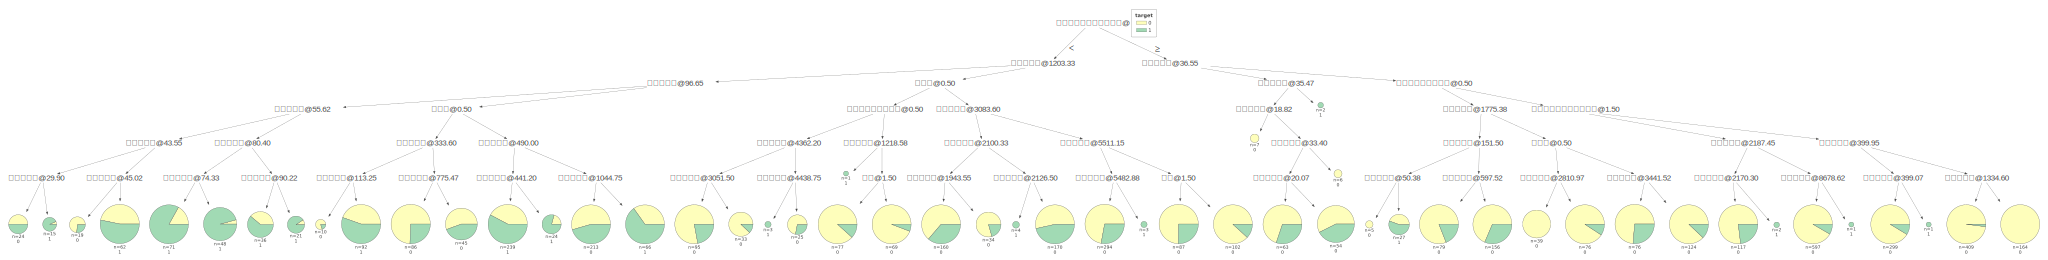

In [8]:
display_result()

各グループのチューニング終了後、下記コマンドをベタ打ちしてもらう  
⇒グループごとに最終正解率を発表  
の流れを想定。コマンドはパワポのスライドを用意する予定  
（「display_competition_result()と入力してください」的なもの）

In [9]:
# ここはイベント当日に参加者にベタ打ちしてもらう
display_competition_result()

最終正解率：76.70%
